In [1]:
import torch
import torchvision
from torchvision import transforms, datasets, models
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from PIL import Image

In [2]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
# device = torch.device('cpu')
device = torch.device('cuda')

In [4]:
class MaskDataset(object):
    def __init__(self, transforms, file):
        self.transforms = transforms
        self.file = file

    def __getitem__(self, idx):
        img = Image.open(self.file).convert("RGB")
        
        if self.transforms is not None:
            img = self.transforms(img)

        img = img.to(device)

        return img, None

    def __len__(self):
        return 1

In [5]:
data_transform = transforms.Compose([
        transforms.ToTensor(), 
    ])

In [6]:
def collate_fn(batch):
    return tuple(zip(*batch))

def get_source(img):
    dataset = MaskDataset(data_transform, img)
    data_loader = torch.utils.data.DataLoader(dataset, batch_size=4, collate_fn=collate_fn)

    return data_loader

def get_model_instance_segmentation(num_classes):
    # load an instance segmentation model pre-trained pre-trained on COCO
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

# model_path: E:\\DATA\\[promakers] mask\\model.pt
def load_model(model_path):
    model2 = get_model_instance_segmentation(4)
    
    model2.load_state_dict(torch.load(model_path, map_location=device))
    model2.eval()
    model2.to(device)

    return model2

In [7]:
def plot_image(img_tensor, annotation):
    
    fig,ax = plt.subplots(1)
    img = img_tensor.cpu().data

    # Display the image
    ax.imshow(img.permute(1, 2, 0))
    
    for box in annotation["boxes"]:
        xmin, ymin, xmax, ymax = box

        # Create a Rectangle patch
        rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.show()

In [8]:
imagenet_class_index = json.load(open('../imagenet_class_index.json'))

model = load_model('model.pt')

In [9]:
def get_prediction(file):
    data_loader = get_source(file)

    pred2 = None
    for img, _ in data_loader:
        pred2 = model(img)
        break
        
    return img, pred2

[{'boxes': tensor([[208.0346,  90.6092, 368.2092, 250.5612]], device='cuda:0',
       grad_fn=<StackBackward>), 'labels': tensor([1], device='cuda:0'), 'scores': tensor([0.9995], device='cuda:0', grad_fn=<IndexBackward>)}]


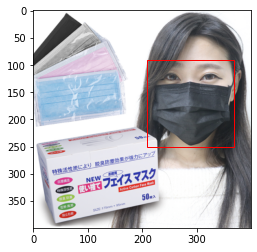

In [10]:
fname = '/workspace/mask/archive/images/maksssksksss109.png'

img, pred = get_prediction(fname)

print(pred)
plot_image(img[0], pred[0])

[{'boxes': tensor([[146.4295, 193.7321, 238.8955, 319.8820]], device='cuda:0',
       grad_fn=<StackBackward>), 'labels': tensor([3], device='cuda:0'), 'scores': tensor([0.9995], device='cuda:0', grad_fn=<IndexBackward>)}]


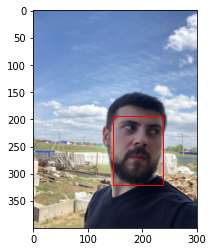

In [11]:
fname = '/workspace/mask/archive/images/maksssksksss14.png'

img, pred = get_prediction(fname)

print(pred)
plot_image(img[0], pred[0])

[{'boxes': tensor([[112.4267, 176.8552, 206.9778, 289.8054]], device='cuda:0',
       grad_fn=<StackBackward>), 'labels': tensor([3], device='cuda:0'), 'scores': tensor([0.9995], device='cuda:0', grad_fn=<IndexBackward>)}]


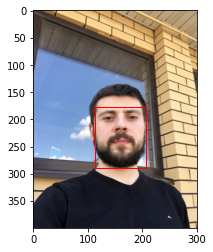

In [12]:
fname = '/workspace/mask/archive/images/maksssksksss72.png'

img, pred = get_prediction(fname)

print(pred)
plot_image(img[0], pred[0])